In [ ]:
import pandas as pd

df_space = pd.read_csv(r"D:\Datasets\spaceship_train.csv")
print("dataset is loaded successfully!!")

dataset is loaded successfully!!


In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

File and Data Field Descriptions
train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
1. PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
2. HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
3. CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
4. Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
5. Destination - The planet the passenger will be debarking to.
6. Age - The age of the passenger.
7. VIP - Whether the passenger has paid for special VIP service during the voyage.
8. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
9. Name - The first and last names of the passenger.
10. Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [ ]:
df_space.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df_space.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
df_space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df_space.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
df_space.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [ ]:
df_space["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
def pie_chart(feature_name , array):
    return df_space[feature_name].value_counts().plot(kind = "pie" , explode = array ,
                                                      shadow = True , autopct = '%1.1F%%' , 
                                                      textprops = {'fontsize' : 14}).set_title(feature_name , fontsize = 20)

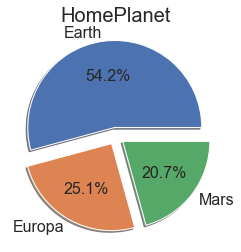

In [ ]:
People_Homes =  df_space["HomePlanet"]. value_counts()

HomePlanets = People_Homes.index.to_list()
Resident = People_Homes.values

plt.pie(x = Resident , labels = HomePlanets , textprops= {'fontsize' : 16} , autopct = "%1.1f%%" , shadow = True , explode = [0.1 , 0.1 ,0.1])
plt.title("HomePlanet" , fontsize = 20)
plt.show()

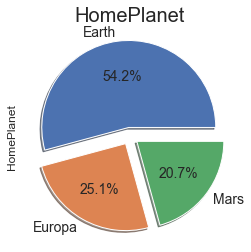

In [ ]:
pie_chart("HomePlanet" , [0.1 , 0.1 , 0.1])
plt.show()

In [ ]:
df_space["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

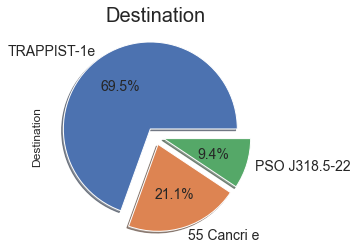

In [ ]:
pie_chart("Destination" , [0.1 , 0.1 , 0.1])
plt.show()

In [ ]:
df_space["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

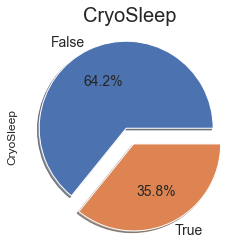

In [ ]:
pie_chart("CryoSleep" , [0.1 , 0.1])
plt.show()

Most of the people are not in cryosleep

In [ ]:
df_space["VIP"].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

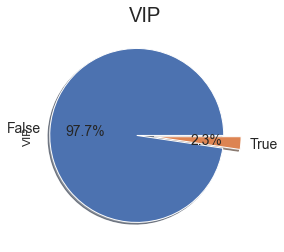

In [ ]:
pie_chart("VIP" , [0.1 , 0.1])
plt.show()

In [ ]:
df_space.drop(columns= "VIP" , inplace = True)

In [ ]:
df_space["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

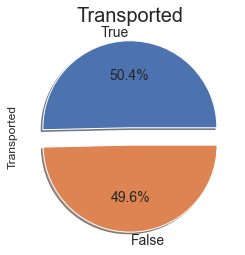

In [ ]:
pie_chart("Transported" , [0.1 , 0.1])
plt.show()

In [ ]:
df_space.groupby(["CryoSleep" , "Transported"]).count()["PassengerId"]

CryoSleep  Transported
False      False          3650
           True           1789
True       False           554
           True           2483
Name: PassengerId, dtype: int64

Person in cryosleep are more likely to travel to another dimension

In [ ]:
df_space.groupby(["HomePlanet" , "Transported"]).count()["PassengerId"]

HomePlanet  Transported
Earth       False          2651
            True           1951
Europa      False           727
            True           1404
Mars        False           839
            True            920
Name: PassengerId, dtype: int64

In [ ]:
df_space.groupby(["HomePlanet" , "Destination"]).count()["PassengerId"]

HomePlanet  Destination  
Earth       55 Cancri e       690
            PSO J318.5-22     712
            TRAPPIST-1e      3101
Europa      55 Cancri e       886
            PSO J318.5-22      19
            TRAPPIST-1e      1189
Mars        55 Cancri e       193
            PSO J318.5-22      49
            TRAPPIST-1e      1475
Name: PassengerId, dtype: int64

In [ ]:
#def barchart(feature_name):
#      transported = df_space[df_space["Transported"] == True][feature_name].value_counts()
#      N_transported = df_space[df_space["Transported"] == False][feature_name].value_counts()
#      df = pd.DataFrame([transported , N_transported] , index = ["Transported" , "Not-Transported"])
#      return df
#sns.countplot(data = df , x = df.index , hue = feature_name )

def CountPlot(feature_name):
    sns.catplot(kind = 'count' , data = df_space , x = feature_name , hue = "Transported" , legend = True)

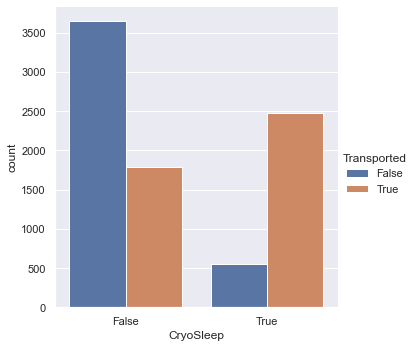

In [ ]:
#sns.catplot(kind = 'count' , data = df_space , x = "CryoSleep" , hue = "Transported" , legend = True)
CountPlot("CryoSleep")

Person in CryoSleep is more likely to be transported

Person not in cryosleep is very less likely to be transported

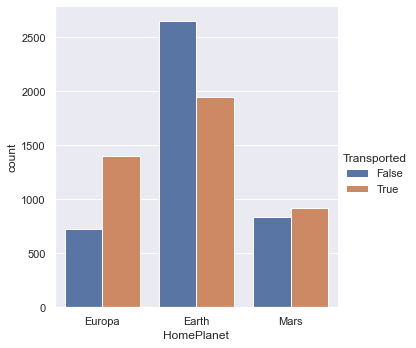

In [ ]:
CountPlot("HomePlanet")

Person from Earth is less likely to be transported

Person from Europa is more likely to be transported

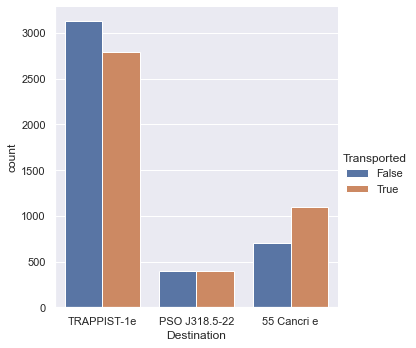

In [ ]:
CountPlot("Destination")

In [ ]:
df_space.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [ ]:
df_space.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

1. AGE

In [ ]:
age_median = df_space["Age"].median()
df_space["Age"].fillna(age_median , inplace = True)

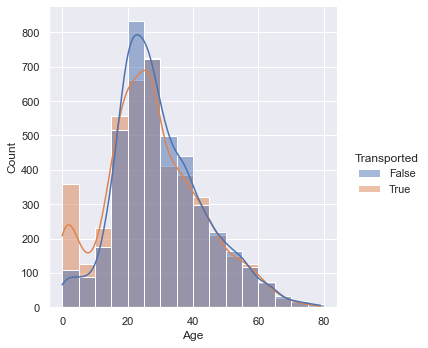

In [ ]:
sns.displot(kind = 'hist' , data = df_space , x = 'Age' , hue = 'Transported' , binwidth = 5 , kde = True)

In [ ]:
import numpy as np
df_space['Age_group'] = np.nan

In [ ]:
df_space.loc[df_space["Age"]<=20 , ['Age_group']] = 1,
df_space.loc[(df_space["Age"]>20) & (df_space["Age"]<=40) , ['Age_group']] = 2,
df_space.loc[df_space["Age"]>40 , ['Age_group']] = 3

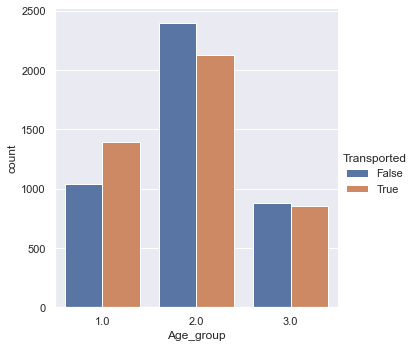

In [ ]:
sns.catplot(kind = 'count' , data = df_space , x = 'Age_group' , hue = 'Transported')

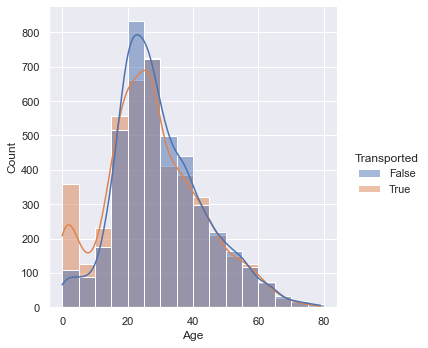

In [ ]:
sns.displot(kind = 'hist' , data = df_space , x = 'Age' , hue = 'Transported' , kde = True , binwidth = 5)

In [ ]:
df_space["Age"].isna().sum()

0

2. LUXURY SERVICES

In [ ]:
def fill_missing(feature_name):
    median = df_space[feature_name].median()
    df_space[feature_name].fillna(median , inplace = True)

In [ ]:
fill_missing("RoomService")
fill_missing("FoodCourt")
fill_missing("ShoppingMall")
fill_missing("Spa")
fill_missing("VRDeck")

In [ ]:
df_space["RoomService"].isna().sum()

0

(0.0, 1500.0)

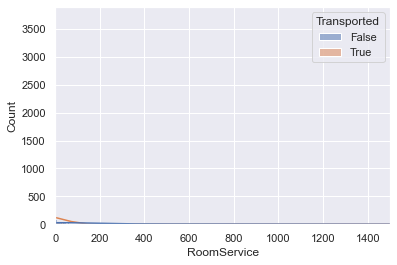

In [ ]:
sns.histplot(data = df_space , x = 'RoomService' , hue = 'Transported' , kde = True)
plt.xlim(0,1500)

In [ ]:
df_space["Total_Services"] = df_space['RoomService'] + df_space['']

PASSENGERID 

In [ ]:
df_space["Group_Id"] = df_space["PassengerId"].str[0:4]
#df_space["Person_Id"] = df_space["PassengerId"].str[5:7]

df_space.drop(columns = "PassengerId" , inplace = True)

In [ ]:
df_space.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_group,Group_Id
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,2.0,0001
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2.0,0002
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3.0,0003
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2.0,0003
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1.0,0004


In [ ]:
Group_size = df_space["Group_Id"].value_counts()
Group_size

4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: Group_Id, Length: 6217, dtype: int64

In [ ]:
df_final = df_space.set_index( ["Group_Id"])
df_final.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_group
Group_Id,,,,,,,,,,,,,
0001,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,2.0
0002,Earth,False,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2.0
0003,Europa,False,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3.0
0003,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2.0
0004,Earth,False,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1.0


In [ ]:
df_final["Group_Size"] = Group_size

In [ ]:
df_final.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_group,Group_Size
Group_Id,,,,,,,,,,,,,,
0001,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,2.0,1
0002,Earth,False,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2.0,1
0003,Europa,False,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3.0,2
0003,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2.0,2
0004,Earth,False,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1.0,1


In [ ]:
df_final["Group_Size"] = df_final["Group_Size"].astype('str')

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001 to 9280
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8693 non-null   float64
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Name          8493 non-null   object 
 11  Transported   8693 non-null   bool   
 12  Age_group     8693 non-null   float64
 13  Group_Size    8693 non-null   object 
dtypes: bool(1), float64(7), object(6)
memory usage: 959.3+ KB


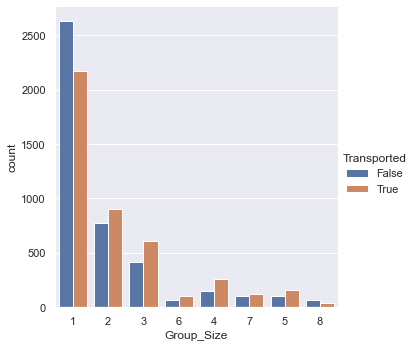

In [ ]:
sns.catplot(kind = 'count' , data = df_final , x = 'Group_Size' , hue = 'Transported')

In [ ]:
df_final['Solo'] =(df_final['Group_Size'] == '1').astype(int)

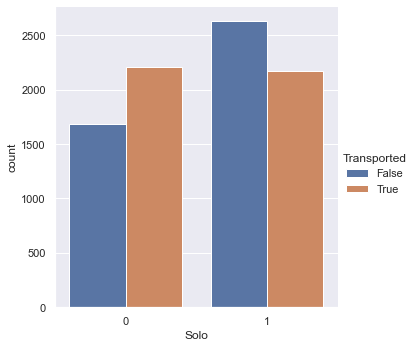

In [ ]:
sns.catplot(kind = 'count' , data = df_final , x = 'Solo' , hue = 'Transported')

CABIN

In [ ]:
df_space['Cabin'].head()

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

In [ ]:

df_space['Cabin'].fillna('Z/999/Z', inplace = True)

df_space['Cabin_Deck'] = df_space['Cabin'].apply(lambda x : x.split('/')[0])
df_space['Cabin_Number'] = df_space['Cabin'].apply(lambda x : x.split('/')[1]).astype('int64')
df_space['Cabin_Port'] = df_space['Cabin'].apply(lambda x : x.split('/')[2])

In [ ]:
df_space.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_group,Group_Id,Cabin_Deck,Cabin_Number,Cabin_Port
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,2.0,0001,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2.0,0002,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3.0,0003,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2.0,0003,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1.0,0004,F,1,S


In [ ]:
df_space.drop(columns = "Cabin" , inplace = True)

In [ ]:
df_space.head()

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_group,Group_Id,Cabin_Deck,Cabin_Number,Cabin_Port
0,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,2.0,0001,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2.0,0002,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3.0,0003,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2.0,0003,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1.0,0004,F,1,S


In [ ]:
def CountPlot(feature_name):
    sns.catplot(kind = 'count' , x = feature_name , data = df_space , hue = 'Transported')

In [ ]:
 #df_space['Cabin_Deck'].where(df_space['Cabin_Deck'] == 'Z' , mode_deck[0] , inplace = True)

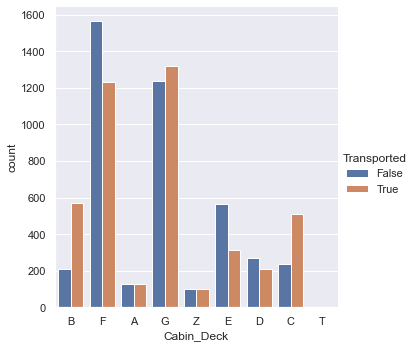

In [ ]:
CountPlot('Cabin_Deck')

In [ ]:
df_space['B_OR_C'] = np.nan

df_space.loc[(df_space['Cabin_Deck'] == 'B') | (df_space['Cabin_Deck'] == 'C') , ['B_OR_C']] =  1
df_space.loc[(df_space['Cabin_Deck'] != 'B') & (df_space['Cabin_Deck'] != 'C') , ['B_OR_C']] =  0

In [ ]:
df_space['B_OR_C'].sum()

1526.0

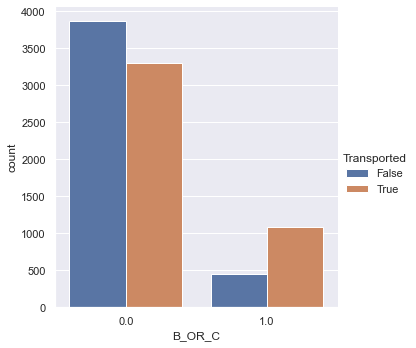

In [ ]:
CountPlot('B_OR_C')

(0.0, 2000.0)

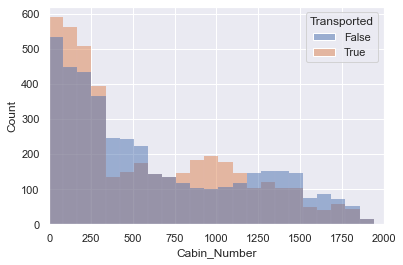

In [ ]:
sns.histplot(data = df_space , x = 'Cabin_Number' , hue = 'Transported')
plt.xlim(0,2000)

In [ ]:
df_space['Cabin_region'] = np.nan

df_space.loc[df_space['Cabin_Number'] <= 300 , ['Cabin_region']]  = 1
df_space.loc[(df_space['Cabin_Number'] > 300 )& (df_space['Cabin_Number'] <= 700 ), ['Cabin_region']]  = 2
df_space.loc[(df_space['Cabin_Number'] > 700 )& (df_space['Cabin_Number'] <= 1200), ['Cabin_region']]  = 3
df_space.loc[(df_space['Cabin_Number'] > 1200) &( df_space['Cabin_Number'] <= 2000) , ['Cabin_region']]  = 4
df_space.loc[df_space['Cabin_Number'] > 2000, ['Cabin_region']]  = 99

In [ ]:
df_space['Cabin_region'].nunique()

4

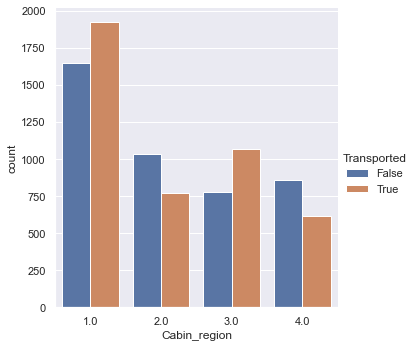

In [ ]:
CountPlot('Cabin_region')

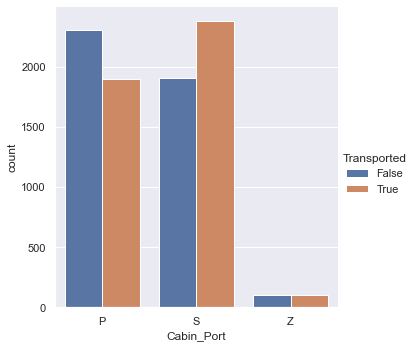

In [ ]:
CountPlot('Cabin_Port')

In [ ]:
df_space['Cabin_Port'] = df_space['Cabin_Port'].map({'P' : 0 , 'S' : 1 , 'Z' : 99})

NAMES

In [ ]:

#df_space['Name'].fillna('Rishabh Kamboj' , inplace = True)

df_space['LastName'] = df_space['Name'].str.split().str[-1]

df_space['LastName'].isnull().sum()

200

In [ ]:
mode_lastname = df_space['LastName'].mode()
df_space['LastName'].fillna(mode_lastname[0] , inplace = True)
#mode_lastname

In [ ]:
df_space['LastName'].isna().sum()

0

In [ ]:
df_space['Family_Size'] = df_space['LastName'].map(df_space['LastName'].value_counts())

df_space['Family_Size']

0       1
1       4
2       6
3       6
4       6
       ..
8688    3
8689    2
8690    6
8691    6
8692    6
Name: Family_Size, Length: 8693, dtype: int64

In [ ]:
df_space['Family_Size'].isnull().sum()

0

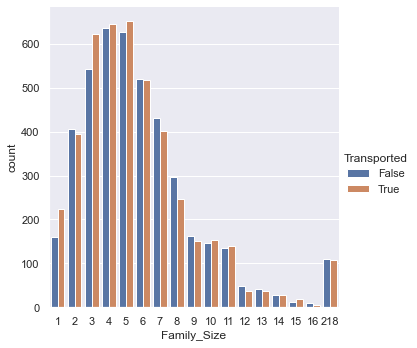

In [ ]:
sns.catplot(kind = 'count' , data = df_space , x = 'Family_Size' , hue = 'Transported')
#plt.xlim(0,20)
#plt.ylim(0,700)

LUXURY PURCHASE

In [ ]:
df_space["Luxury_Items"] = df_space[""]

AGE 

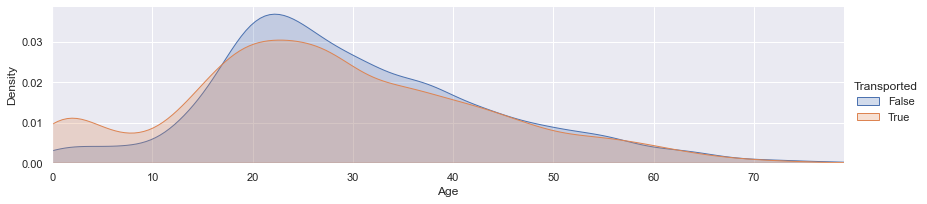

In [ ]:
facet = sns.FacetGrid(df_space , hue = "Transported" ,aspect = 4 )
facet.map(sns.kdeplot ,'Age', shade = True )
facet.set(xlim = (0,df_space["Age"].max()))
facet.add_legend()


plt.show()

In [ ]:
df_space.loc[df_space["Age"] <= 15 , ["Age"] ] = 1
df_space.loc[(df_space["Age"] > 15) & (df_space["Age"] <= 30), ["Age"] ] = 2
df_space.loc[(df_space["Age"] > 30) & (df_space["Age"] <= 45) , ["Age"] ] = 3
df_space.loc[df_space["Age"] >45 , ["Age"] ] = 4

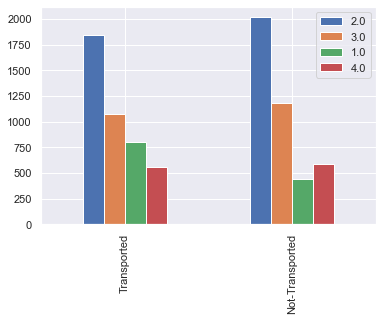

In [ ]:
barchart("Age")

In [ ]:
df_space.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,3.0,False,1.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,2.0,False,1.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,4.0,True,1.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,3.0,False,1.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,2.0,False,2.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df_space.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
df_space.loc[df_space["RoomService"] <= 150 , ["RoomService"]] = 1
df_space.loc[df_space["RoomService"] > 150 , ["RoomService"]] = 2

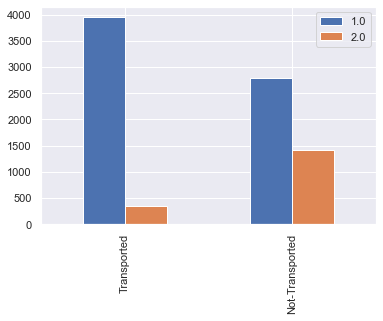

Person with age < 15 more likely to be transported